 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_df = pd.read_csv("Challenge Files/Resources/whale_returns.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")

In [4]:
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

In [7]:
whale_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv("Challenge Files/Resources/algo_returns.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")

In [9]:
# Count nulls
algo_returns_df.isnull().count()

Algo 1    1241
Algo 2    1241
dtype: int64

In [10]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

In [11]:
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv("Challenge Files/Resources/sp500_history.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")

In [13]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [14]:
# Sort the index to ascending dates
sp500_history_df.sort_index(inplace=True)

In [15]:
sp500_history_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [16]:
# Fix Data Types

# Remove $ from "Close" column
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")

# Change "Close" column from object type to float type
sp500_history_df["Close"] = sp500_history_df.Close.astype(float)

In [17]:
sp500_history_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [18]:
# Calculate Daily Returns
sp500_history_returns_df = sp500_history_df.pct_change()

In [19]:
# Drop nulls
sp500_history_returns_df.dropna(inplace=True)

In [20]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_returns_df.rename(columns={"Close":"SP_500"}, inplace=True)

In [21]:
sp500_history_returns_df

,SP_500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_algo_sp500_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_returns_df], axis = 1, join="inner")

In [23]:
whale_algo_sp500_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

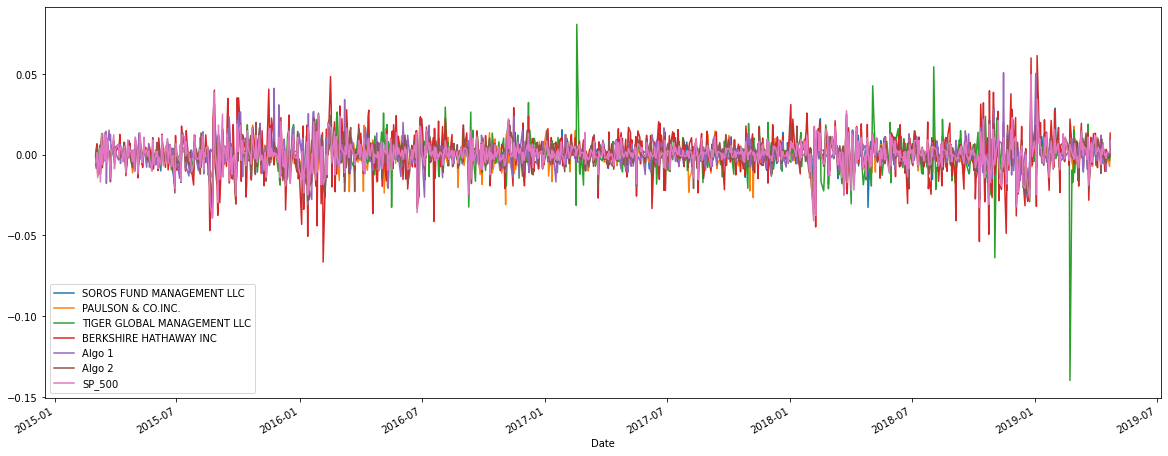

In [24]:
# Plot daily returns of all portfolios

# Combined
whale_algo_sp500_returns_df.plot(figsize=(20,8));

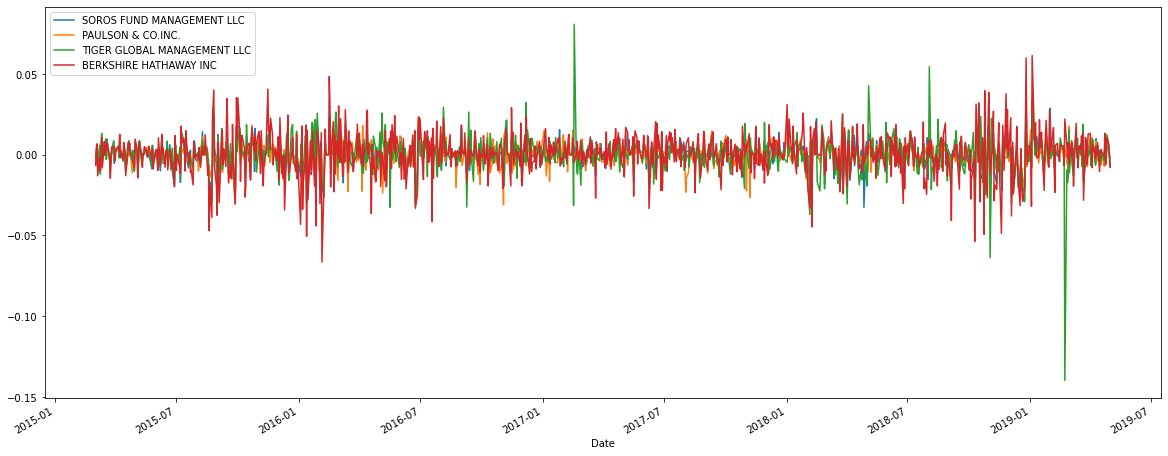

In [25]:
# Whale Returns
whale_returns_df.plot(figsize=(20,8));

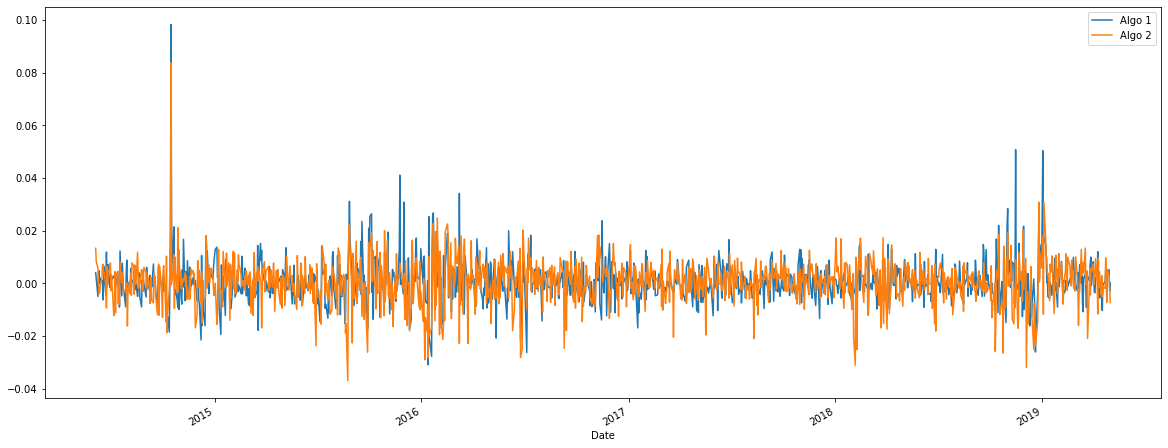

In [26]:
# Algo Returns
algo_returns_df.plot(figsize=(20,8));

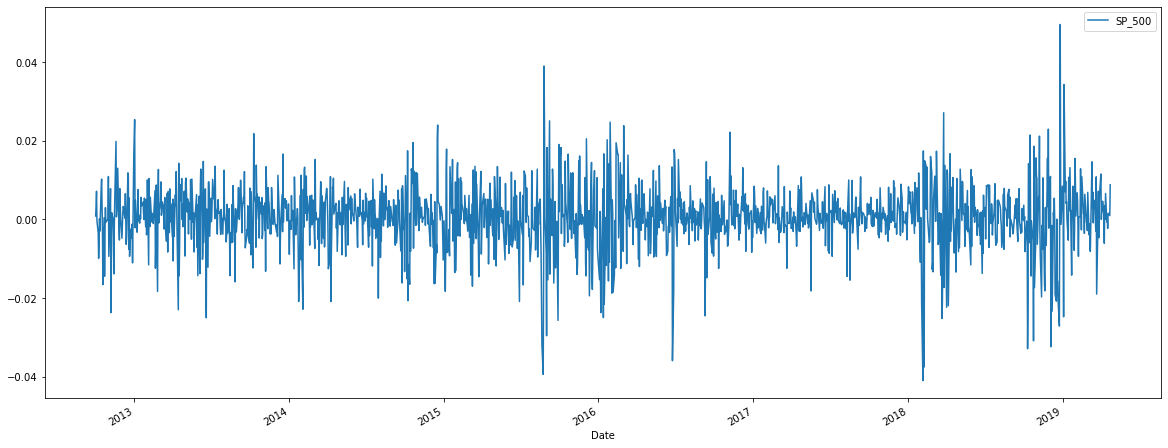

In [27]:
# S&P 500 Returns
sp500_history_returns_df.plot(figsize=(20,8));

#### Calculate and Plot cumulative returns.

In [28]:
# Calculate cumulative returns of all portfolios
cumulative_returns_df = (1 + whale_algo_sp500_returns_df).cumprod()

In [29]:
cumulative_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072
...,...,...,...,...,...,...,...
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,1.372945
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,1.369823
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,1.371986


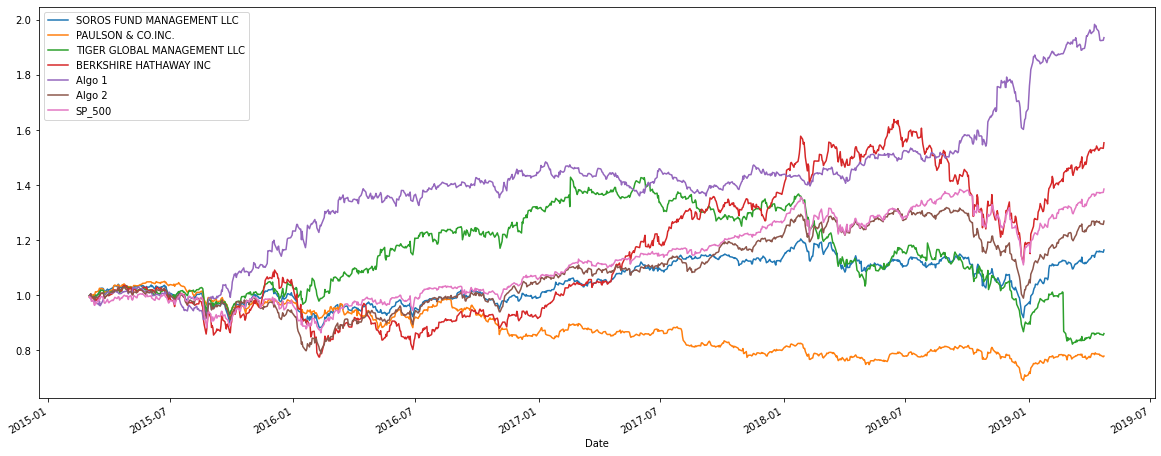

In [30]:
# Plot cumulative returns
cumulative_returns_df.plot(figsize=(20,8));

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


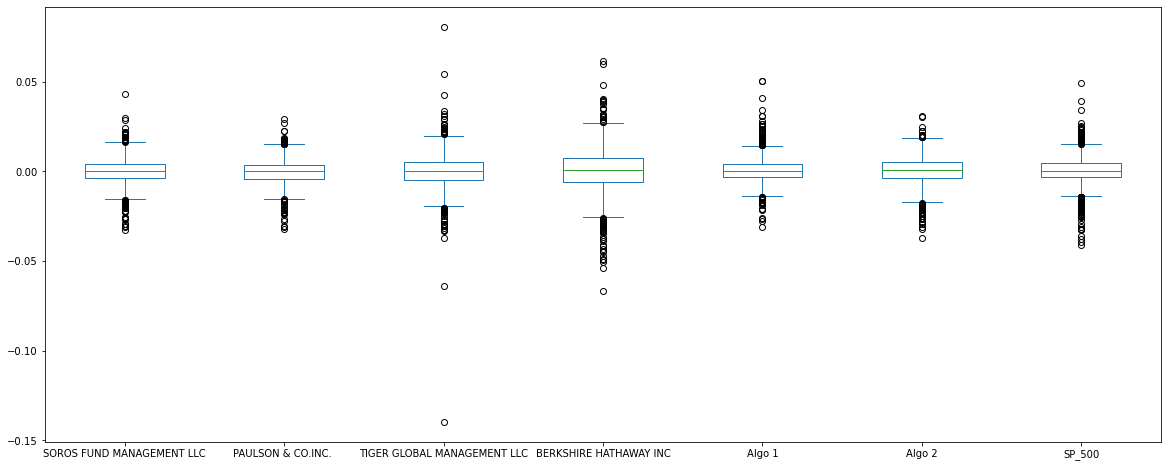

In [31]:
# Box plot to visually show risk
whale_algo_sp500_returns_df.plot(kind="box",figsize=(20,8));

### Calculate Standard Deviations

In [32]:
# Calculate the daily standard deviations of all portfolios
whale_algo_sp500_returns_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP_500                         0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [33]:
# Calculate the daily standard deviation of S&P 500
whale_algo_sp500_returns_df.std().loc["SP_500"]

0.008553731597758204

In [34]:
# Determine which portfolios are riskier than the S&P 500
riskier = whale_algo_sp500_returns_df.std().loc["SP_500"] >= whale_algo_sp500_returns_df.std()
whale_algo_sp500_returns_df.std().loc[~riskier]

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [35]:
# Calculate the annualized standard deviation (252 trading days)
whale_algo_sp500_returns_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP_500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [36]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_algo_sp500_returns_df.rolling(window = 21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


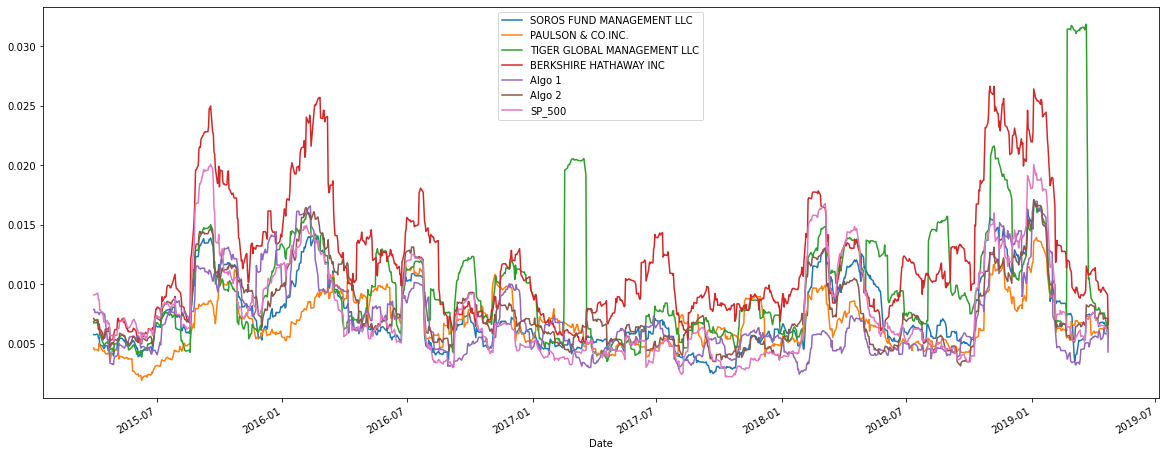

In [40]:
# Plot the rolling standard deviation
whale_algo_sp500_returns_df.rolling(window = 21).std().plot(figsize=(20,8));

### Calculate and plot the correlation

In [41]:
# Calculate the correlation
whale_algo_sp500_returns_df.corr()
# Display the correlation matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP_500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


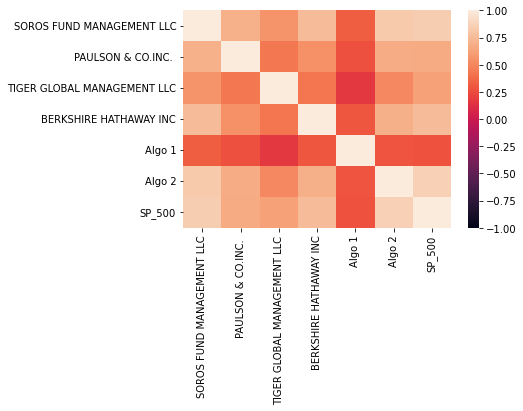

In [42]:
# Display the correlation heat map
import seaborn as sns
sns.heatmap(whale_algo_sp500_returns_df.corr(), vmin=-1, vmax=1);

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [46]:
# Calculate covariance of a single portfolio
covariance_algo = whale_algo_sp500_returns_df["Algo 2"].cov(whale_algo_sp500_returns_df["SP_500"])
# Calculate variance of S&P 500
variance_SP_500 = whale_algo_sp500_returns_df["SP_500"].var()
# Computing beta
beta_algo = covariance_algo / variance_SP_500
beta_algo

0.8375345402757753

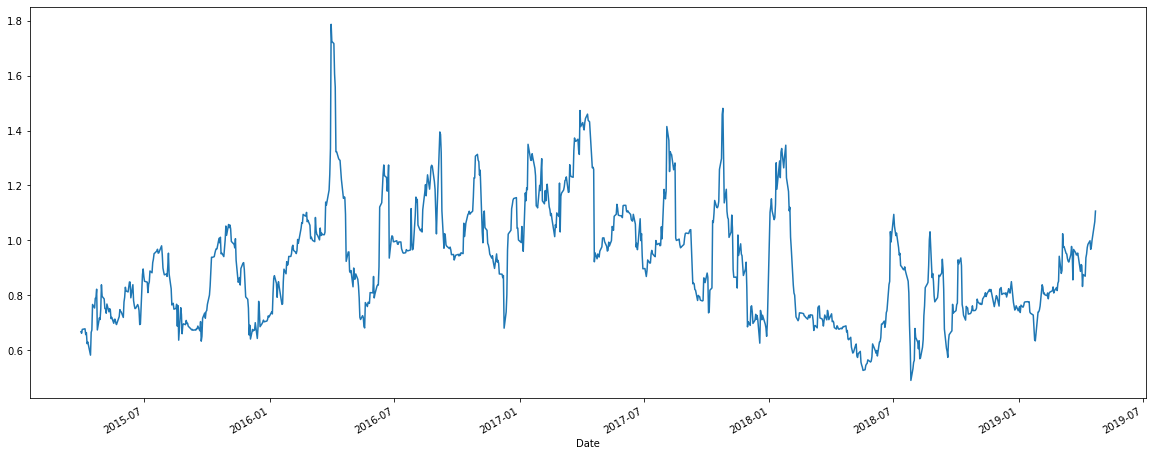

In [51]:
# Plot beta trend
covariance_algo_rolling21 = whale_algo_sp500_returns_df["Algo 2"].rolling(window = 21).cov(whale_algo_sp500_returns_df["SP_500"])
variance_SP_500_rolling21 = whale_algo_sp500_returns_df["SP_500"].rolling(window = 21).var()
beta_algo_rolling21 = covariance_algo_rolling21 / variance_SP_500_rolling21
beta_algo_rolling21.plot(figsize=(20,8));

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

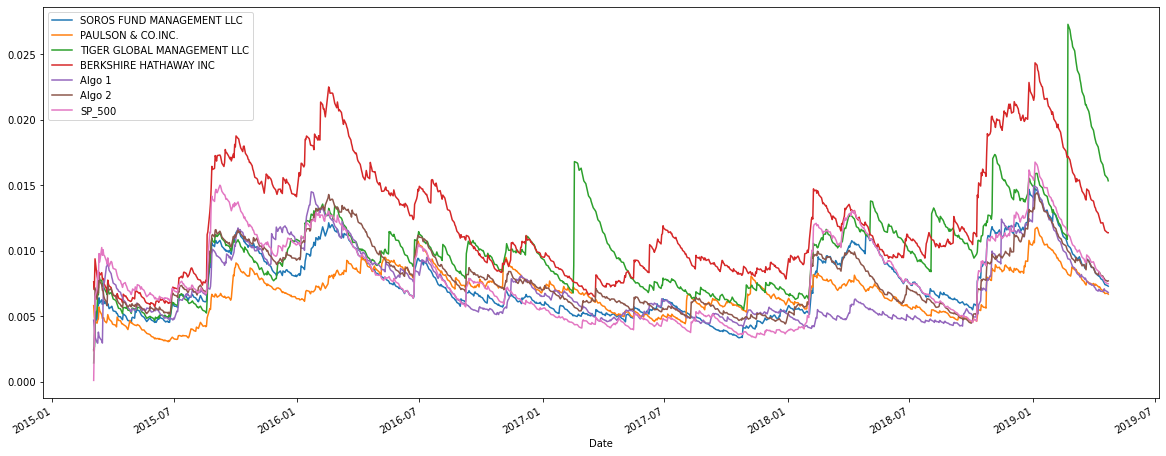

In [52]:
# Use `ewm` to calculate the rolling window
whale_algo_sp500_returns_df.ewm(halflife = 21).std().plot(figsize=(20,8));

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [60]:
# Annualized Sharpe Ratios
sharpe_ratio = (whale_algo_sp500_returns_df.mean() / whale_algo_sp500_returns_df.std())*np.sqrt(252)
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP_500                         0.648267
dtype: float64

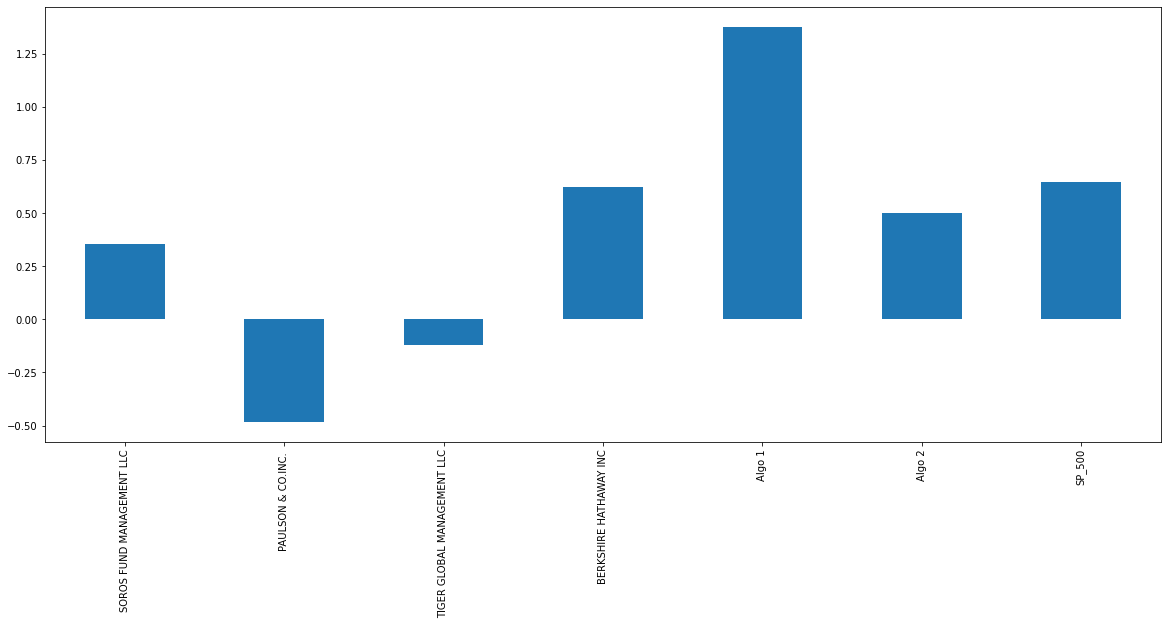

In [61]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind = "bar", figsize=(20,8));

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [90]:
# Reading data from 1st stock
apple_prices_df = pd.read_csv("Challenge Files/Resources/aapl_historical.csv", parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")

In [91]:
# Reading data from 2nd stock
costco_prices_df = pd.read_csv("Challenge Files/Resources/cost_historical.csv", parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")

In [92]:
# Reading data from 3rd stock
google_prices_df = pd.read_csv("Challenge Files/Resources/goog_historical.csv", parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")

In [93]:
# Combine all stocks in a single DataFrame
apple_google_costco_prices_df = pd.concat([apple_prices_df, costco_prices_df, google_prices_df], join="inner")

In [94]:
apple_google_costco_prices_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [95]:
# Reset Date index
apple_google_costco_prices_df.sort_index(inplace=True)

In [96]:
apple_google_costco_prices_df

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-11,AAPL,188.59
2018-05-11,COST,195.76
2018-05-14,AAPL,188.15
2018-05-14,COST,195.88
...,...,...
2019-05-08,COST,241.34
2019-05-08,AAPL,202.90
2019-05-09,GOOG,1162.38


In [97]:
# Reorganize portfolio data by having a column per symbol
apple_google_costco_prices_df = apple_google_costco_prices_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")

In [98]:
apple_google_costco_prices_df

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [105]:
# Calculate daily returns
myportfolio_daily_returns_df = apple_google_costco_prices_df.pct_change()
# Drop NAs
myportfolio_daily_returns_df.dropna(inplace=True)
# Display sample data
myportfolio_daily_returns_df

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

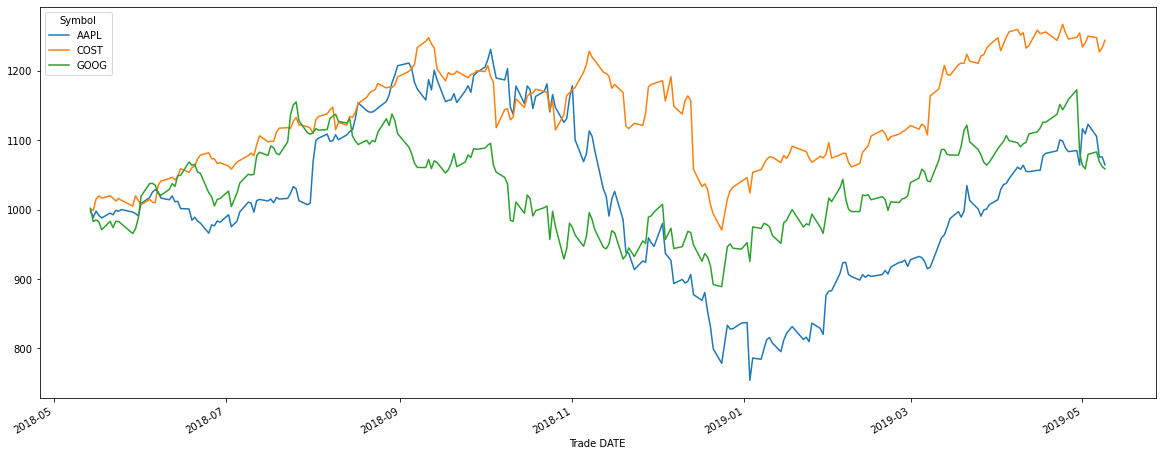

In [106]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
initial_investment = 1000
myportfolio_weighted_returns = myportfolio_daily_returns_df.dot(weights)
myportfolio_cumulative_returns = (1 + myportfolio_daily_returns_df).cumprod()
# Display sample data
(initial_investment * myportfolio_cumulative_returns).plot(figsize=(20,8));

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [107]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_df = pd.concat([myportfolio_daily_returns_df, whale_algo_sp500_returns_df], axis = 1, join="inner")

In [108]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns_df.dropna(inplace = True)

In [109]:
combined_returns_df

,AAPL,COST,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
2018-05-14,-0.002333,0.000613,0.001766,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.009088,-0.002042,-0.019060,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009333,0.016523,0.002354,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.006324,0.004479,-0.002940,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.003637,-0.003206,-0.011339,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.000100,-0.004019,0.004938,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.019473,0.000897,0.007505,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.003594,0.001018,0.000024,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.003287,-0.009723,0.010086,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [110]:
# Calculate the annualized `std`
combined_returns_df.std()*np.sqrt(252)

AAPL                           0.296951
COST                           0.212034
GOOG                           0.255500
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP_500                         0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

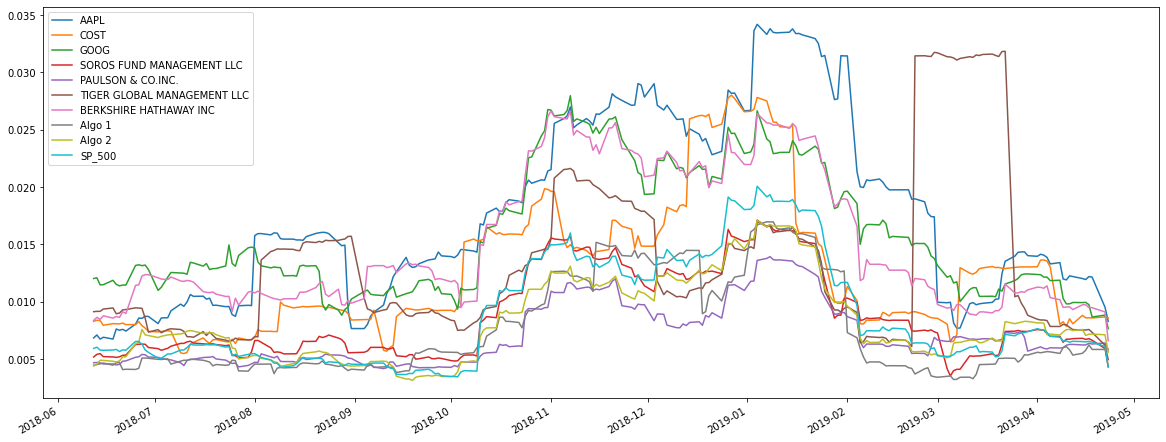

In [111]:
# Calculate rolling standard deviation
combined_returns_df.rolling(window = 21).std()
# Plot rolling standard deviation
combined_returns_df.rolling(window = 21).std().plot(figsize=(20,8));

### Calculate and plot the correlation

In [113]:
# Calculate and plot the correlation
combined_returns_df.corr()

,AAPL,COST,GOOG,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_500
AAPL,1.000000,0.433918,0.692497,0.609126,0.544949,0.334864,0.694062,0.224385,0.639512,0.759909
COST,0.433918,1.000000,0.410074,0.518175,0.496810,0.353235,0.431956,0.139522,0.496460,0.590297
GOOG,0.692497,0.410074,1.000000,0.682919,0.554123,0.291055,0.824391,0.272740,0.682227,0.792070
SOROS FUND MANAGEMENT LLC,0.609126,0.518175,0.682919,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO.INC.,0.544949,0.496810,0.554123,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL MANAGEMENT LLC,0.334864,0.353235,0.291055,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY INC,0.694062,0.431956,0.824391,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
Algo 1,0.224385,0.139522,0.272740,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
Algo 2,0.639512,0.496460,0.682227,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
SP_500,0.759909,0.590297,0.792070,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


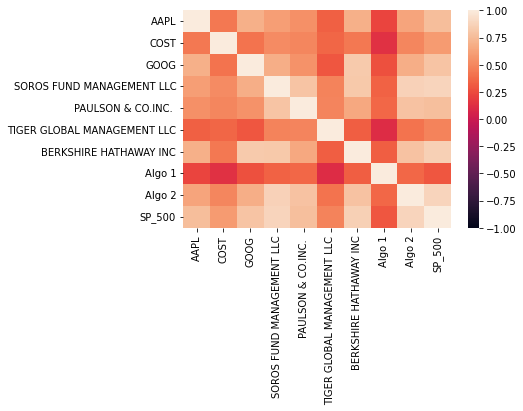

In [114]:
sns.heatmap(combined_returns_df.corr(), vmin=-1, vmax=1);

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [115]:
# Calculate and plot Beta

# Calculate covariance of a single portfolio
covariance_myportfolio = myportfolio_daily_returns_df[.cov(whale_algo_sp500_returns_df["SP_500"])
# Calculate variance of S&P 500
variance_SP_500 = whale_algo_sp500_returns_df["SP_500"].var()
# Computing beta
beta_myportfolio = covariance_myportfolio / variance_SP_500
beta_myportfolio

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!